In [121]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from math import sqrt
import itertools
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.svm import SVC

№1.3

In [122]:
housing = pd.read_csv('housing.csv')
housing['blank'] = housing['total_bedrooms'].apply(lambda total_bedrooms: 0 if math.isnan(total_bedrooms) else 1)

DUMMY_SEP = '__'
housing = pd.get_dummies(housing, prefix_sep=DUMMY_SEP)

In [123]:
housing['average_rooms'] = housing['total_rooms']/housing['households']
housing['average_bedrooms'] = housing['total_bedrooms']/housing['households']

housing = housing.drop('total_rooms', axis=1)
housing = housing.drop('total_bedrooms', axis=1)

In [124]:
housing_blank = housing.loc[housing['blank'] == 0]
housing_blank = housing_blank.drop('blank', axis=1)

housing =  housing.loc[housing['blank'] == 1]
housing = housing.drop('blank', axis=1)

Заполнение пропусков:

In [125]:
housing_without_value = housing.drop('median_house_value', axis=1)
X_housing_without_value = housing_without_value.drop('average_bedrooms', axis=1)
y_housing_without_value = housing_without_value['average_bedrooms']

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_housing_without_value, y_housing_without_value) 


housing_blank_without_value = housing_blank.drop('median_house_value', axis=1)

X_blank = housing_blank_without_value.drop('average_bedrooms',axis=1)

predictions = linear_regression_model.predict(X_blank)
housing_blank['average_bedrooms'] = predictions

pd.concat([housing, housing_blank], ignore_index=True)
pass

In [126]:
housing_train_val, housing_test = train_test_split(housing, test_size=0.2)

def normalize(arr):
    arr['longitude'] -= np.mean(arr['longitude'])
    arr['longitude'] /= np.std(arr['longitude'])
    arr['latitude'] -= np.mean(arr['latitude'])
    arr['latitude'] /= np.std(arr['latitude'])

housing_test = housing_test.copy()
normalize(housing_test)

housing_train, housing_val = train_test_split(housing_train_val, test_size=0.5)

housing_val = housing_val.copy()
normalize(housing_val)

housing_train = housing_train.copy()
normalize(housing_train)

housing_blank = housing_blank.copy()
normalize(housing_blank)

№2.4

RMSE: 68944.23656127197


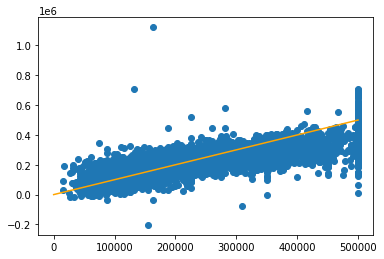

In [127]:
X_housing_train, y_housing_train = housing_train.drop("median_house_value",axis=1), housing_train['median_house_value']

linear_regression_model1 = LinearRegression() 
linear_regression_model1.fit(X_housing_train, y_housing_train) 

X_housing_val, y_housing_val = housing_val.drop("median_house_value",axis=1), housing_val['median_house_value']

predictions1 = linear_regression_model1.predict(X_housing_val)
mse = mean_squared_error(y_housing_val, predictions1) 
print("RMSE: {}".format(np.sqrt(mse)))

fig, ax = plt.subplots()
ax.scatter(y_housing_val, linear_regression_model1.predict(X_housing_val))
ax.plot(np.linspace(0,500000,100), np.linspace(0,500000,100), color='orange')
pass

RMSE: 75142.96237816582


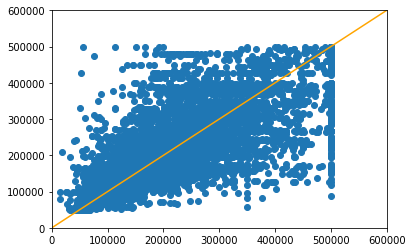

In [128]:
regressor = DecisionTreeRegressor(max_depth = 25, min_samples_split = 33) 
regressor.fit(X_housing_train, y_housing_train) 

predictions_regr = regressor.predict(X_housing_val)
mse2 = mean_squared_error(y_housing_val, predictions_regr) 
print("RMSE: {}".format(np.sqrt(mse2)))

fig, ax = plt.subplots()
ax.set_ylim(0, 600000)
ax.set_xlim(0, 600000)
ax.scatter(y_housing_val, regressor.predict(X_housing_val))
ax.plot(np.linspace(0,1000000,100), np.linspace(0,1000000,100), color='orange')
pass

RMSE: 73095.01203243002


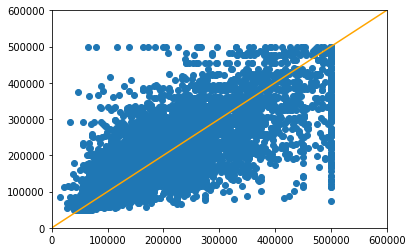

In [129]:
housin = housing.copy()
normalize(housing)

model = KMeans(n_clusters=4)
model.fit(housing[['longitude', 'latitude']])

housing['cluster'] = model.labels_
housing = housing.drop("latitude",axis=1).drop("longitude",axis=1)

housing_train_val, housing_test = train_test_split(housing, test_size=0.2)
housing_train, housing_val = train_test_split(housing_train_val, test_size=0.5)

X_housing_train, y_housing_train = housing_train.drop("median_house_value",axis=1), housing_train['median_house_value']
X_housing_val, y_housing_val = housing_val.drop("median_house_value",axis=1), housing_val['median_house_value']


regressor = DecisionTreeRegressor(max_depth = 25, min_samples_split = 33) 
regressor.fit(X_housing_train, y_housing_train) 

predictions_regr = regressor.predict(X_housing_val)
mse2 = mean_squared_error(y_housing_val, predictions_regr) 
print("RMSE: {}".format(np.sqrt(mse2)))

fig, ax = plt.subplots()
ax.set_ylim(0, 600000)
ax.set_xlim(0, 600000)
ax.scatter(y_housing_val, regressor.predict(X_housing_val))
ax.plot(np.linspace(0,1000000,100), np.linspace(0,1000000,100), color='orange')
pass

№2.1

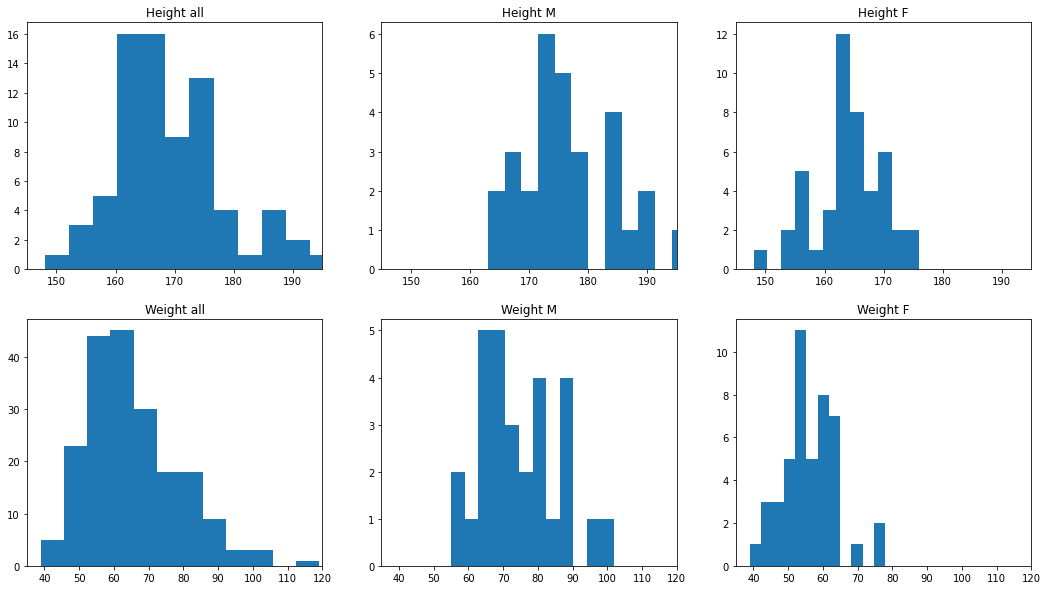

In [133]:
davis = pd.read_csv('Davis.csv')
davis = davis.loc[davis['height'] > 140]

davis_train_val, davis_test = train_test_split(davis, test_size=50)
davis_train, davis_val = train_test_split(davis_train_val, test_size=0.5)

davis_m = davis_train.loc[davis['sex'] == 'M']
davis_f = davis_train.loc[davis['sex'] == 'F']

fig, ax = plt.subplots(2, 3, figsize=(18,10))
ax[0][0].set_xlim(145, 195)
ax[0][0].hist(davis_train['height'], bins = 12)
ax[0][0].set_title('Height all')

ax[0][1].set_xlim(145, 195)
ax[0][1].hist(davis_m['height'], bins = 12)
ax[0][1].set_title('Height M')

ax[0][2].set_xlim(145, 195)
ax[0][2].hist(davis_f['height'], bins = 12)
ax[0][2].set_title('Height F')


ax[1][0].set_xlim(35, 120)
ax[1][0].hist(davis['weight'], bins = 12)
ax[1][0].set_title('Weight all')

ax[1][1].set_xlim(35, 120)
ax[1][1].hist(davis_m['weight'], bins = 12)
ax[1][1].set_title('Weight M')

ax[1][2].set_xlim(35, 120)
ax[1][2].hist(davis_f['weight'], bins = 12)
ax[1][2].set_title('Weight F')
pass

In [135]:
X_train, y_train = davis_train[['height', 'weight']], davis_train['sex']
X_val, y_val = davis_val[['height', 'weight']], davis_val['sex']

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

predictions = logreg.predict(X_train)
print('Accuracy test: {:.2f}'.format(accuracy_score(predictions, y_train)))

predictions = logreg.predict(X_val)
print('Accuracy val: {:.2f}'.format(accuracy_score(predictions, y_val)))

Accuracy test: 0.92
Accuracy val: 0.87


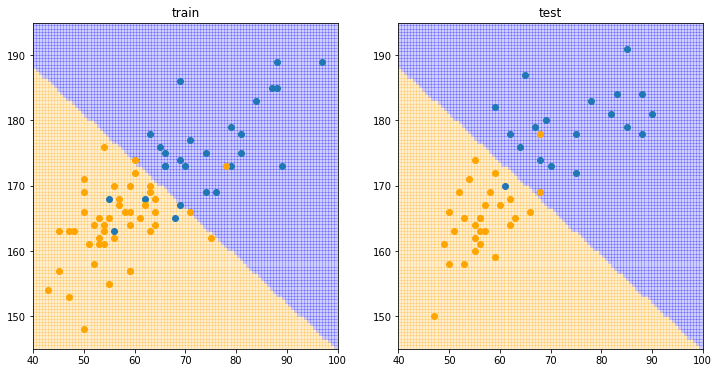

In [137]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

centres_prediction = logreg.predict(list(itertools.product(np.linspace(150,190,100), np.linspace(45,95,100))))

def convert_sex(value):
       value = value.replace('F','1').replace('M', '0')
       return int(value)

centres_prediction = np.vectorize(convert_sex)(np.array(centres_prediction)).reshape(100,100)


x = np.linspace(40,100,101)
y = np.linspace(145,195,101)

cmap = ListedColormap(['blue', 'orange'])
ax[0].pcolormesh(x, y, centres_prediction, alpha=0.2, cmap=cmap)
ax[1].pcolormesh(x, y, centres_prediction, alpha=0.2, cmap=cmap)

#ax[0].plot(X_train, y_train)

ax[0].scatter(davis_m['weight'], davis_m['height'])
ax[0].scatter(davis_f['weight'], davis_f['height'], color='orange')
ax[0].set_ylim(145, 195)
ax[0].set_xlim(40, 100)
ax[0].set_title('train')

davis_test_m = davis_test.loc[davis['sex'] == 'M']
davis_test_f = davis_test.loc[davis['sex'] == 'F']

ax[1].scatter(davis_test_m['weight'], davis_test_m['height'])
ax[1].scatter(davis_test_f['weight'], davis_test_f['height'], color='orange')
ax[1].set_ylim(145, 195)
ax[1].set_xlim(40, 100)
ax[1].set_title('test')

pass